# Stock Market Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
%matplotlib inline



In [2]:
dataset=pd.read_csv('TSLA.csv')


In [3]:
dataset.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


In [4]:
dataset['Date'] = pd.to_datetime(dataset.Date)


In [5]:
dataset.shape

(2843, 7)

In [6]:
dataset.drop('Adj Close',axis = 1, inplace = True)

In [7]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,38557000


In [8]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2843 non-null   datetime64[ns]
 1   Open    2843 non-null   float64       
 2   High    2843 non-null   float64       
 3   Low     2843 non-null   float64       
 4   Close   2843 non-null   float64       
 5   Volume  2843 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 133.4 KB


In [10]:
dataset.describe()

,Open,High,Low,Close,Volume
count,2843.000000,2843.000000,2843.000000,2843.000000,2.843000e+03
mean,105.868475,108.031370,103.555733,105.924597,3.141524e+07
std,188.738974,192.483055,184.638617,188.836358,2.841880e+07
min,3.228000,3.326000,2.996000,3.160000,5.925000e+05
25%,10.698000,11.026000,10.420000,10.727000,1.251050e+07
50%,45.874001,46.493999,45.102001,45.916000,2.481500e+07
75%,65.021000,66.251999,64.015001,65.275002,4.012025e+07
max,891.380005,900.400024,871.599976,883.090027,3.046940e+08


In [11]:
print(len(dataset))

2843


<AxesSubplot:>

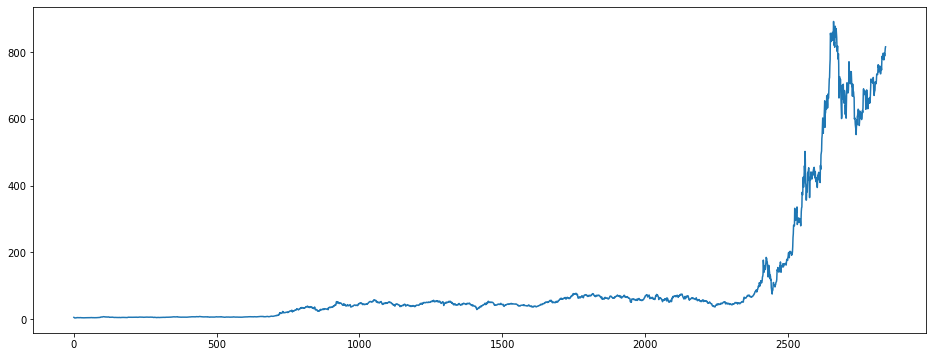

In [12]:
dataset['Open'].plot(figsize=(16,6))


In [13]:
X  = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [16]:
X_train.shape


(2132, 4)

In [17]:
X_test.shape

(711, 4)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [19]:
regressor.fit(X_train,y_train)


LinearRegression()

In [20]:
print(regressor.coef_)


[-6.08132311e-01  9.69397077e-01  6.33087614e-01 -4.49162474e-09]


In [21]:
print(regressor.coef_)


[-6.08132311e-01  9.69397077e-01  6.33087614e-01 -4.49162474e-09]


In [22]:
predicted=regressor.predict(X_test)


In [23]:
print(X_test)

            Open        High         Low    Volume
898    35.032001   35.584000   32.942001  43582000
1644   45.813999   45.995998   45.335999  18254000
1917   63.226002   63.616001   61.250000  31139000
104     7.082000    7.190000    6.666000   5728000
2151   69.241997   70.300003   68.830002  18383500
...          ...         ...         ...       ...
2697  646.599976  657.229980  624.619995  42894000
1715   61.599998   62.796001   61.172001  33688500
2662  820.000000  848.000000  801.000000  26378000
1122   41.858002   41.959999   40.534000  26091500
2470  142.162003  146.145996  139.636002  66060000

[711 rows x 4 columns]


In [24]:
predicted.shape


(711,)

In [25]:
dframe=pd.DataFrame(y_test,predicted)


In [26]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})


In [27]:
print(dfr)


          Actual   Predicted
898    33.924000   33.981978
1644   45.945999   45.478708
1917   63.146000   61.987768
104     6.866000    6.989232
2151   69.461998   69.664797
...          ...         ...
2697  654.869995  639.276627
1715   62.757999   62.120856
2662  835.429993  830.496550
1122   40.807999   40.896703
2470  145.029999  143.456926

[711 rows x 2 columns]


In [28]:
dfr.head(25)


,Actual,Predicted
898,33.924000,33.981978
1644,45.945999,45.478708
1917,63.146000,61.987768
104,6.866000,6.989232
2151,69.461998,69.664797
731,20.926001,20.569133
196,5.054000,5.193010
1421,35.799999,35.052323
1843,65.167999,65.389658
1713,61.119999,60.742239


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [30]:
regressor.score(X_test,y_test)


0.9998378944229679

In [31]:
import math


In [32]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))


Mean Absolute Error: 1.0525046567118528


In [33]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))


Mean Squared  Error: 6.815999211617752


In [34]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))


Root Mean Squared Error: 2.6107468685450437


In [35]:
graph=dfr.head(20)


<AxesSubplot:>

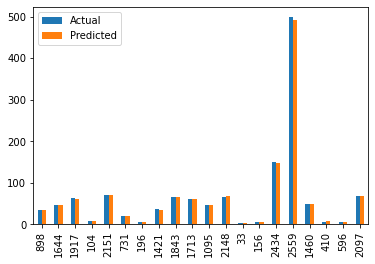

In [36]:
graph.plot(kind='bar')
